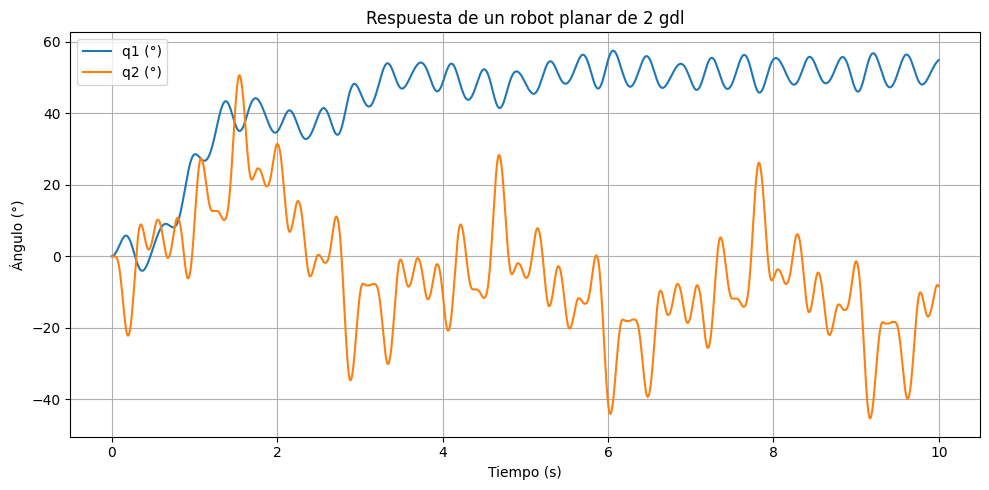

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Dinámica del robot 2GDL
def robot_2gdl(t, x):
    q = np.array([x[0], x[1]])
    qp = np.array([x[2], x[3]])

    # Matriz de inercia
    M = np.array([
        [3.117 + 0.2 * np.cos(q[1]), 0.108 + 0.1 * np.cos(q[1])],
        [0.108 + 0.1 * np.cos(q[1]), 0.108]
    ])

    # Matriz de Coriolis
    C = np.array([
        [-0.2 * np.sin(q[1]) * qp[1], -0.1 * np.sin(q[1]) * qp[1]],
        [0.1 * np.sin(q[1]) * qp[0], 0]
    ])

    # Par gravitacional
    par_grav = np.array([
        39.3 * np.sin(q[0]) + 1.95 * np.sin(q[0] + q[1]),
        1.95 * np.sin(q[0] + q[1])
    ])

    # Fricción viscosa + seca
    fr = np.array([
        1.86 * qp[0] + 1.93 * np.sign(qp[0]),
        0.16 * qp[1] + 2.3 * np.sign(qp[1])
    ])

    # Pares de entrada 
    tau = np.array([
        (1 - np.exp(-0.8 * t)) * 32.0 + 56 * np.sin(16 * (t + 0.1)) + 12 * np.sin(20 * (t + 0.15)),
        (1 - np.exp(-1.8 * t)) * 1.2 + 8 * np.sin(26 * (t + 0.08)) + 2 * np.sin(12 * (t + 0.34))
    ])

    # Aceleración
    q2p = np.linalg.inv(M) @ (tau - C @ qp - par_grav - fr)

    return [qp[0], qp[1], q2p[0], q2p[1]]

# Parámetros de simulación
ti = 0
tf = 10
h = 0.0025
ts = np.arange(ti, tf, h)

x0 = [0, 0, 0, 0]

# Solver
sol = solve_ivp(
    fun=robot_2gdl,
    t_span=(ti, tf),
    y0=x0,
    t_eval=ts,
    method='RK45',
    rtol=1e-3,
    atol=1e-6,
    max_step=h
)

# Graficar resultados
q1_deg = np.rad2deg(sol.y[0])
q2_deg = np.rad2deg(sol.y[1])

plt.figure(figsize=(10, 5))
plt.plot(sol.t, q1_deg, label='q1 (°)')
plt.plot(sol.t, q2_deg, label='q2 (°)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (°)')
plt.title('Respuesta de un robot planar de 2 gdl')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
